# HR Analytics Project- Understanding the Attrition in HR

In [1]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("C:\\Users\\diwak\\Downloads\\phase1_csvFiles\\HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# checking for missing values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
#dropping columns employeecount,over18,Standard Hours as they all have the same value from the dataset
# We will also drop EmployeeNumber as it will not add any value to our analysis
data= data.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
#Now lets look at the data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [9]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [10]:
n_data = data [['Age', 'DailyRate', 'HourlyRate', 'DistanceFromHome','MonthlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
c_data = data.drop(columns=['Age', 'DailyRate', 'HourlyRate', 'DistanceFromHome','MonthlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])


In [11]:
c_data.shape

(1470, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

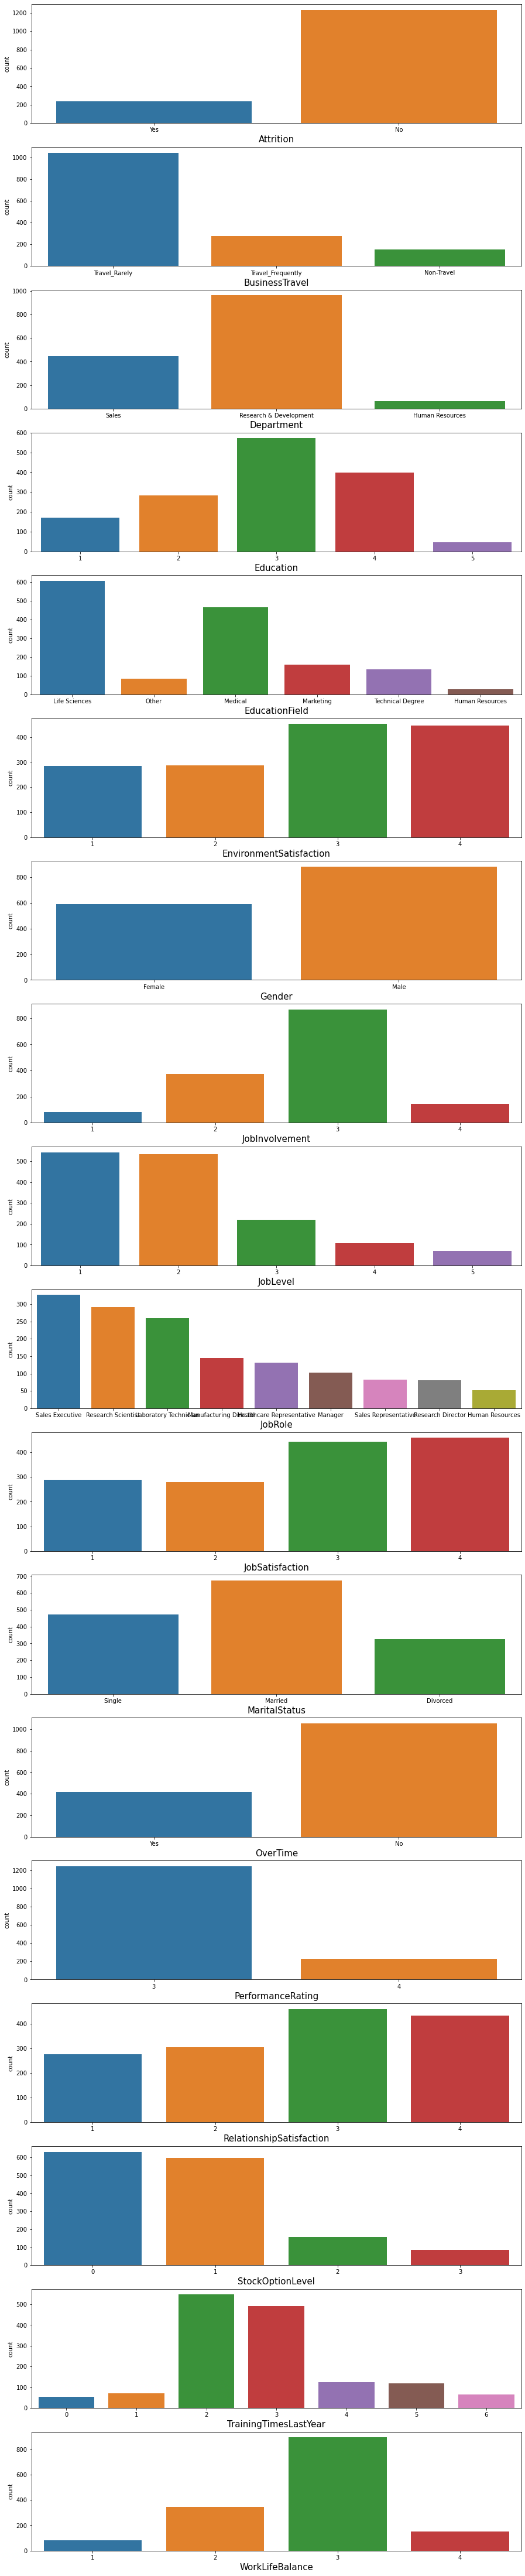

In [12]:
# Analysing Categorical data

plt.figure(figsize=(15,80))
plotnumber = 1
for column in c_data:
    if plotnumber <=18:
        ax= plt.subplot(18,1,plotnumber)
        sns.countplot(c_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show

In [13]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Attrition
------------------------------------------
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


Column Name        : BusinessTravel
------------------------------------------
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64


Column Name        : Department
------------------------------------------
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64


Column Name        : Education
------------------------------------------
3    38.911565
4    27.074830
2    19.183673
1    11.564626
5     3.265306
Name: Education, dtype: float64


Column Name        : EducationField
------------------------------------------
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources  

In [14]:
n_data.shape

(1470, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

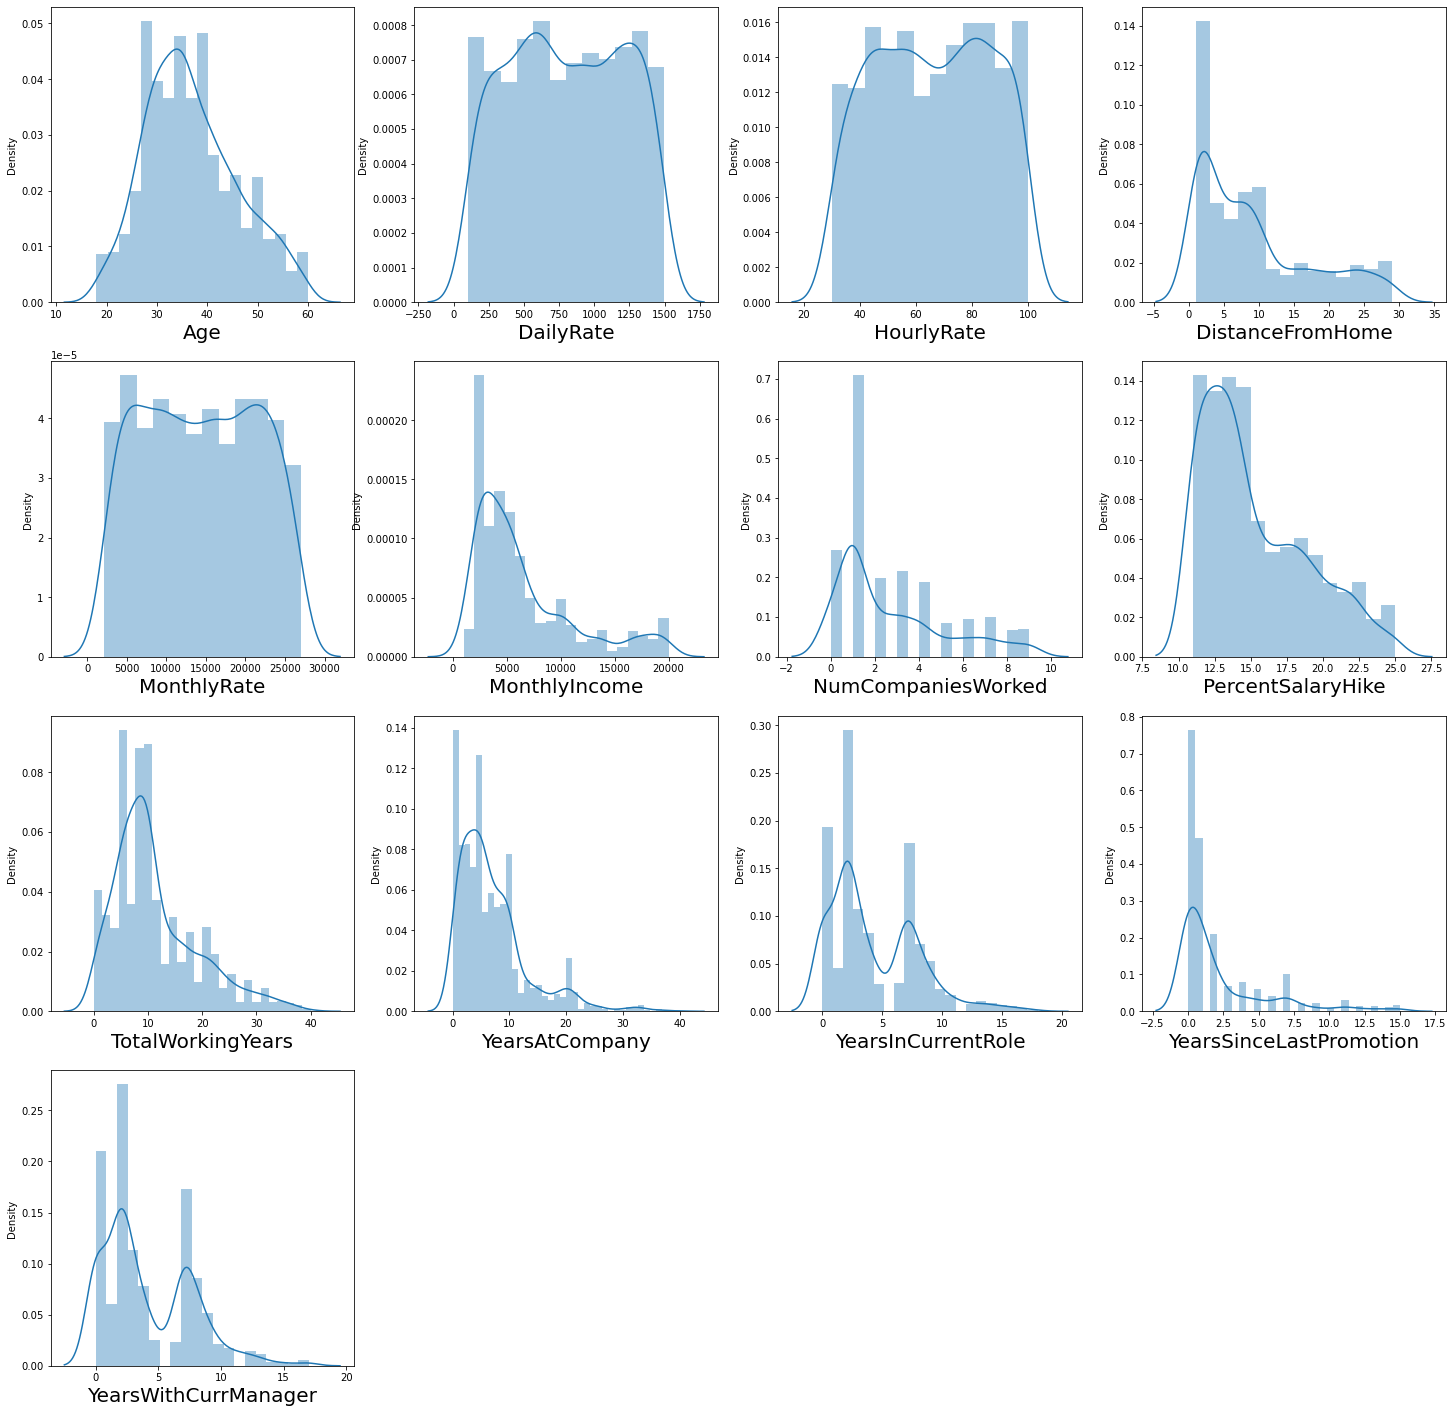

In [15]:
# Data visualization
plt.figure(figsize=(25,25))
plotnumber = 1
for column in n_data:
    if plotnumber <=13:
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [16]:
#checking for skewness
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [17]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


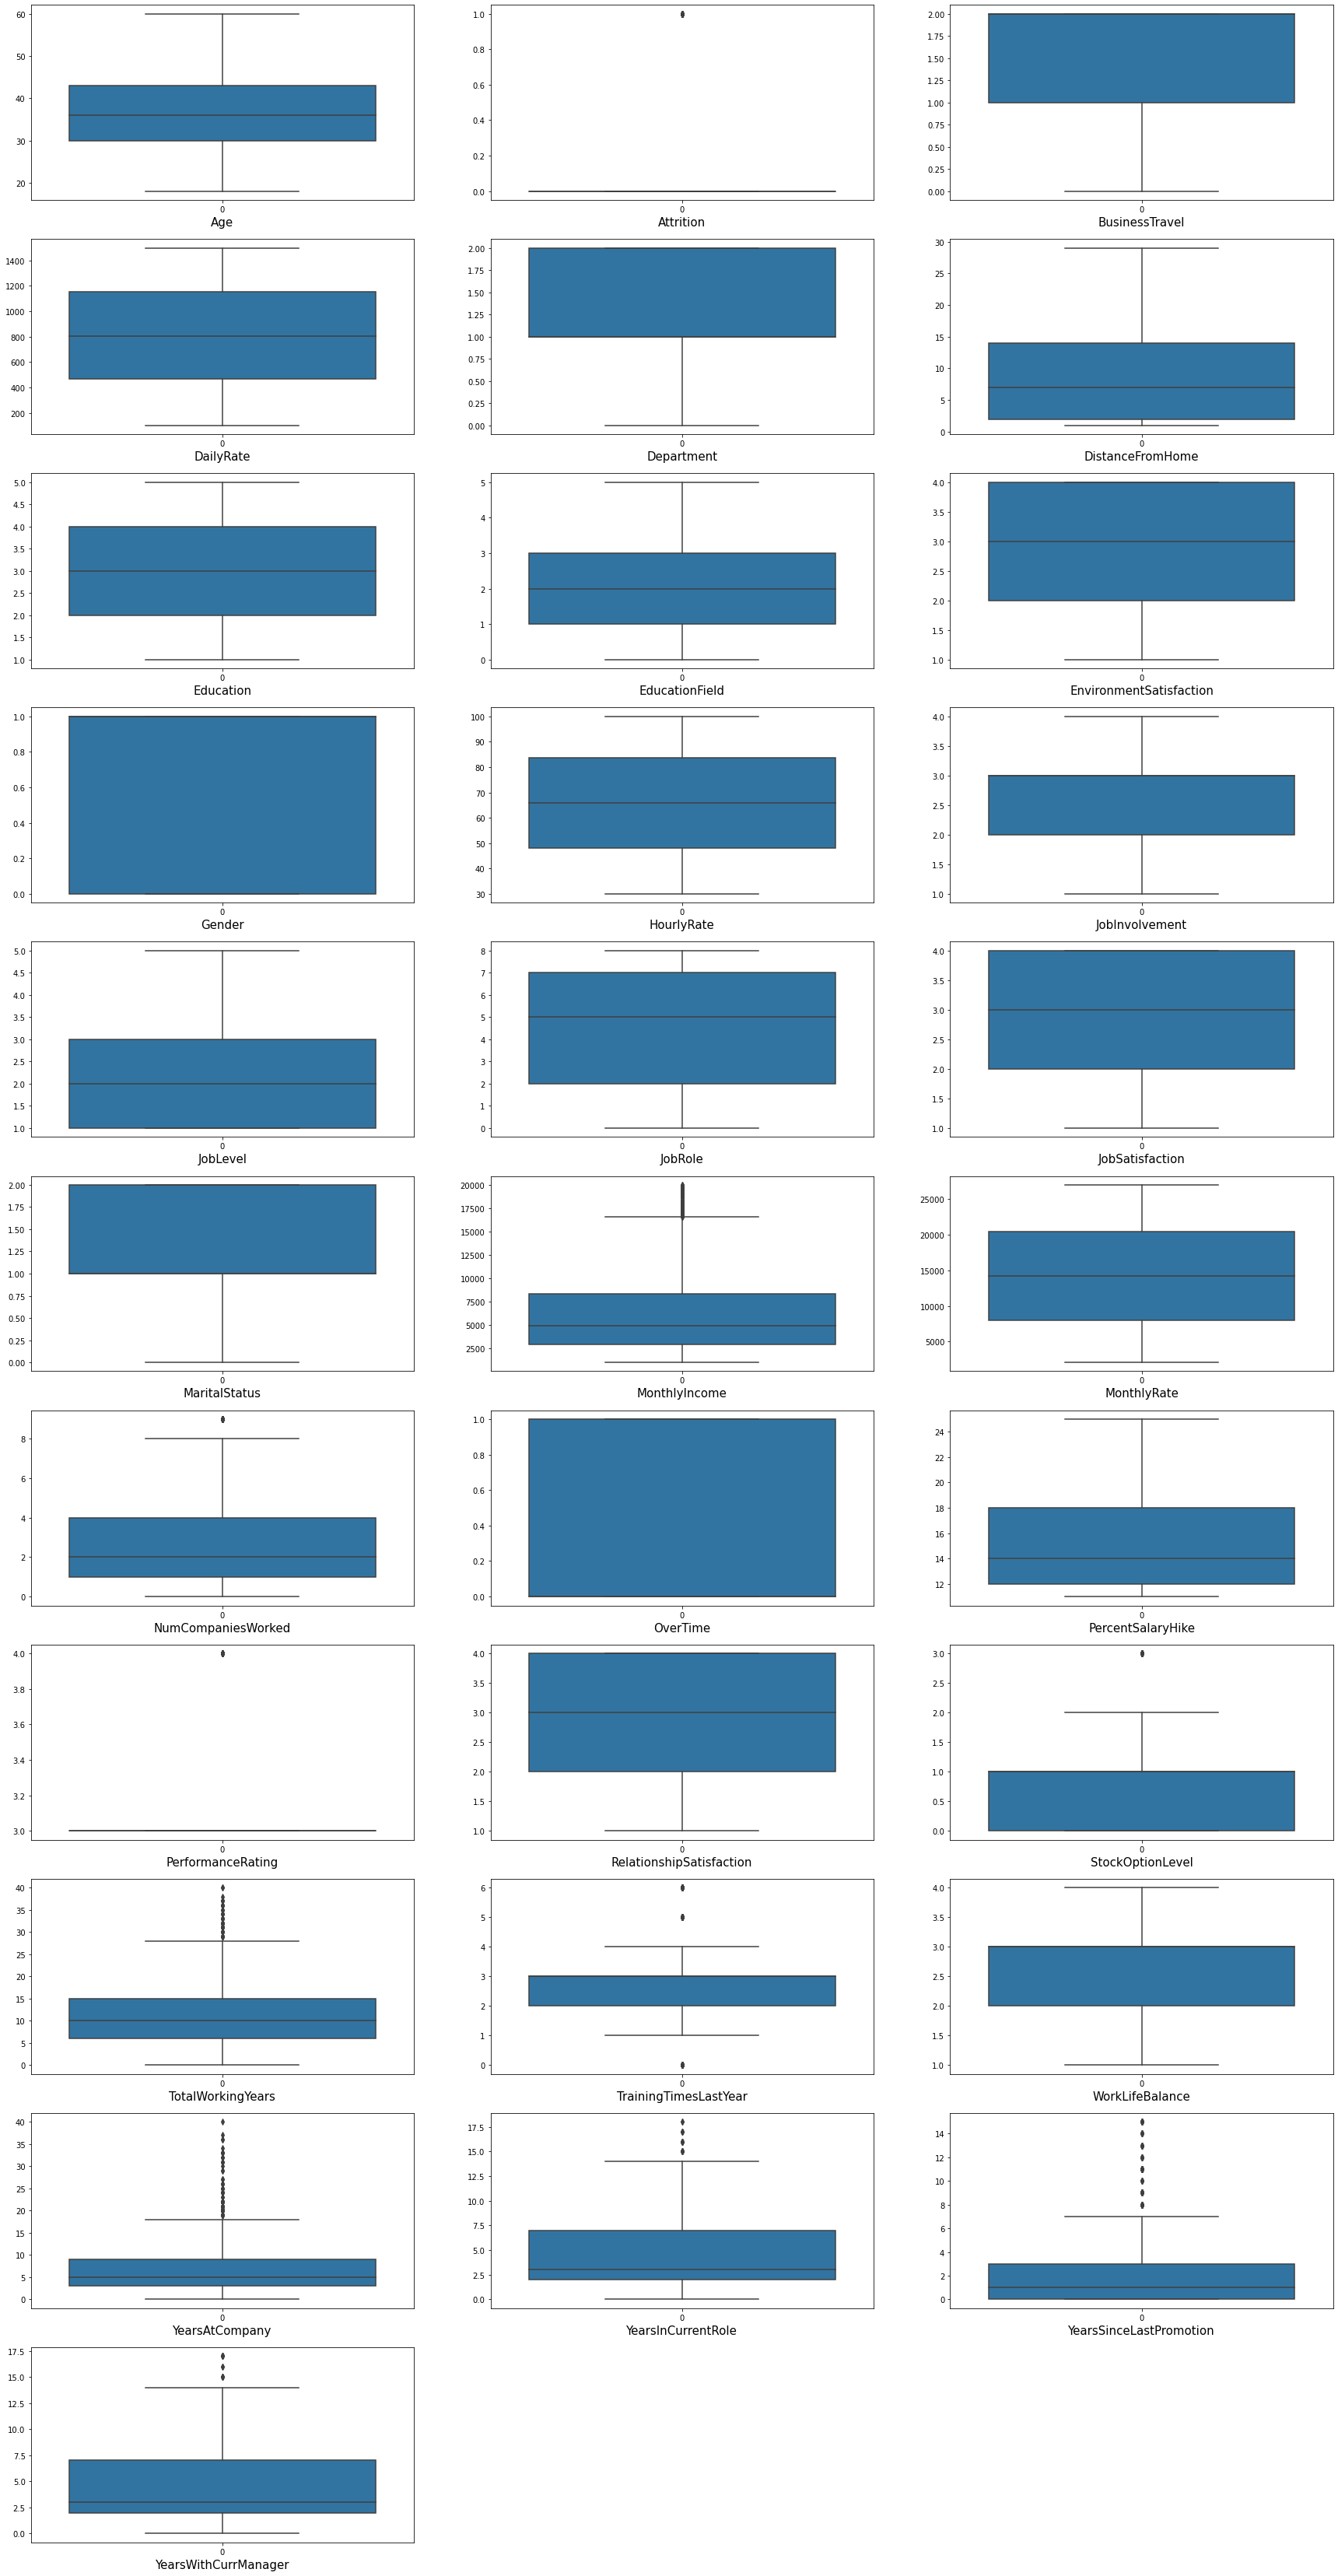

In [18]:
# Checking for outliers using boxplot
plt.figure(figsize=(30,60))
graph =1
for column in data:
    if graph <=31:
        plt.subplot(11,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [19]:
features = data.drop(columns="Attrition")

In [20]:
features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [21]:
#Treating outliers:
# z-score method
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers = np.where(z>3)
outliers

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
        28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
        26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
        23

In [22]:
new_data=data.drop(outliers[0])
new_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [23]:
data_loss=((1469-1387)/1469)*100
data_loss

5.582028590878148

In [24]:
#checking for skewness
new_data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

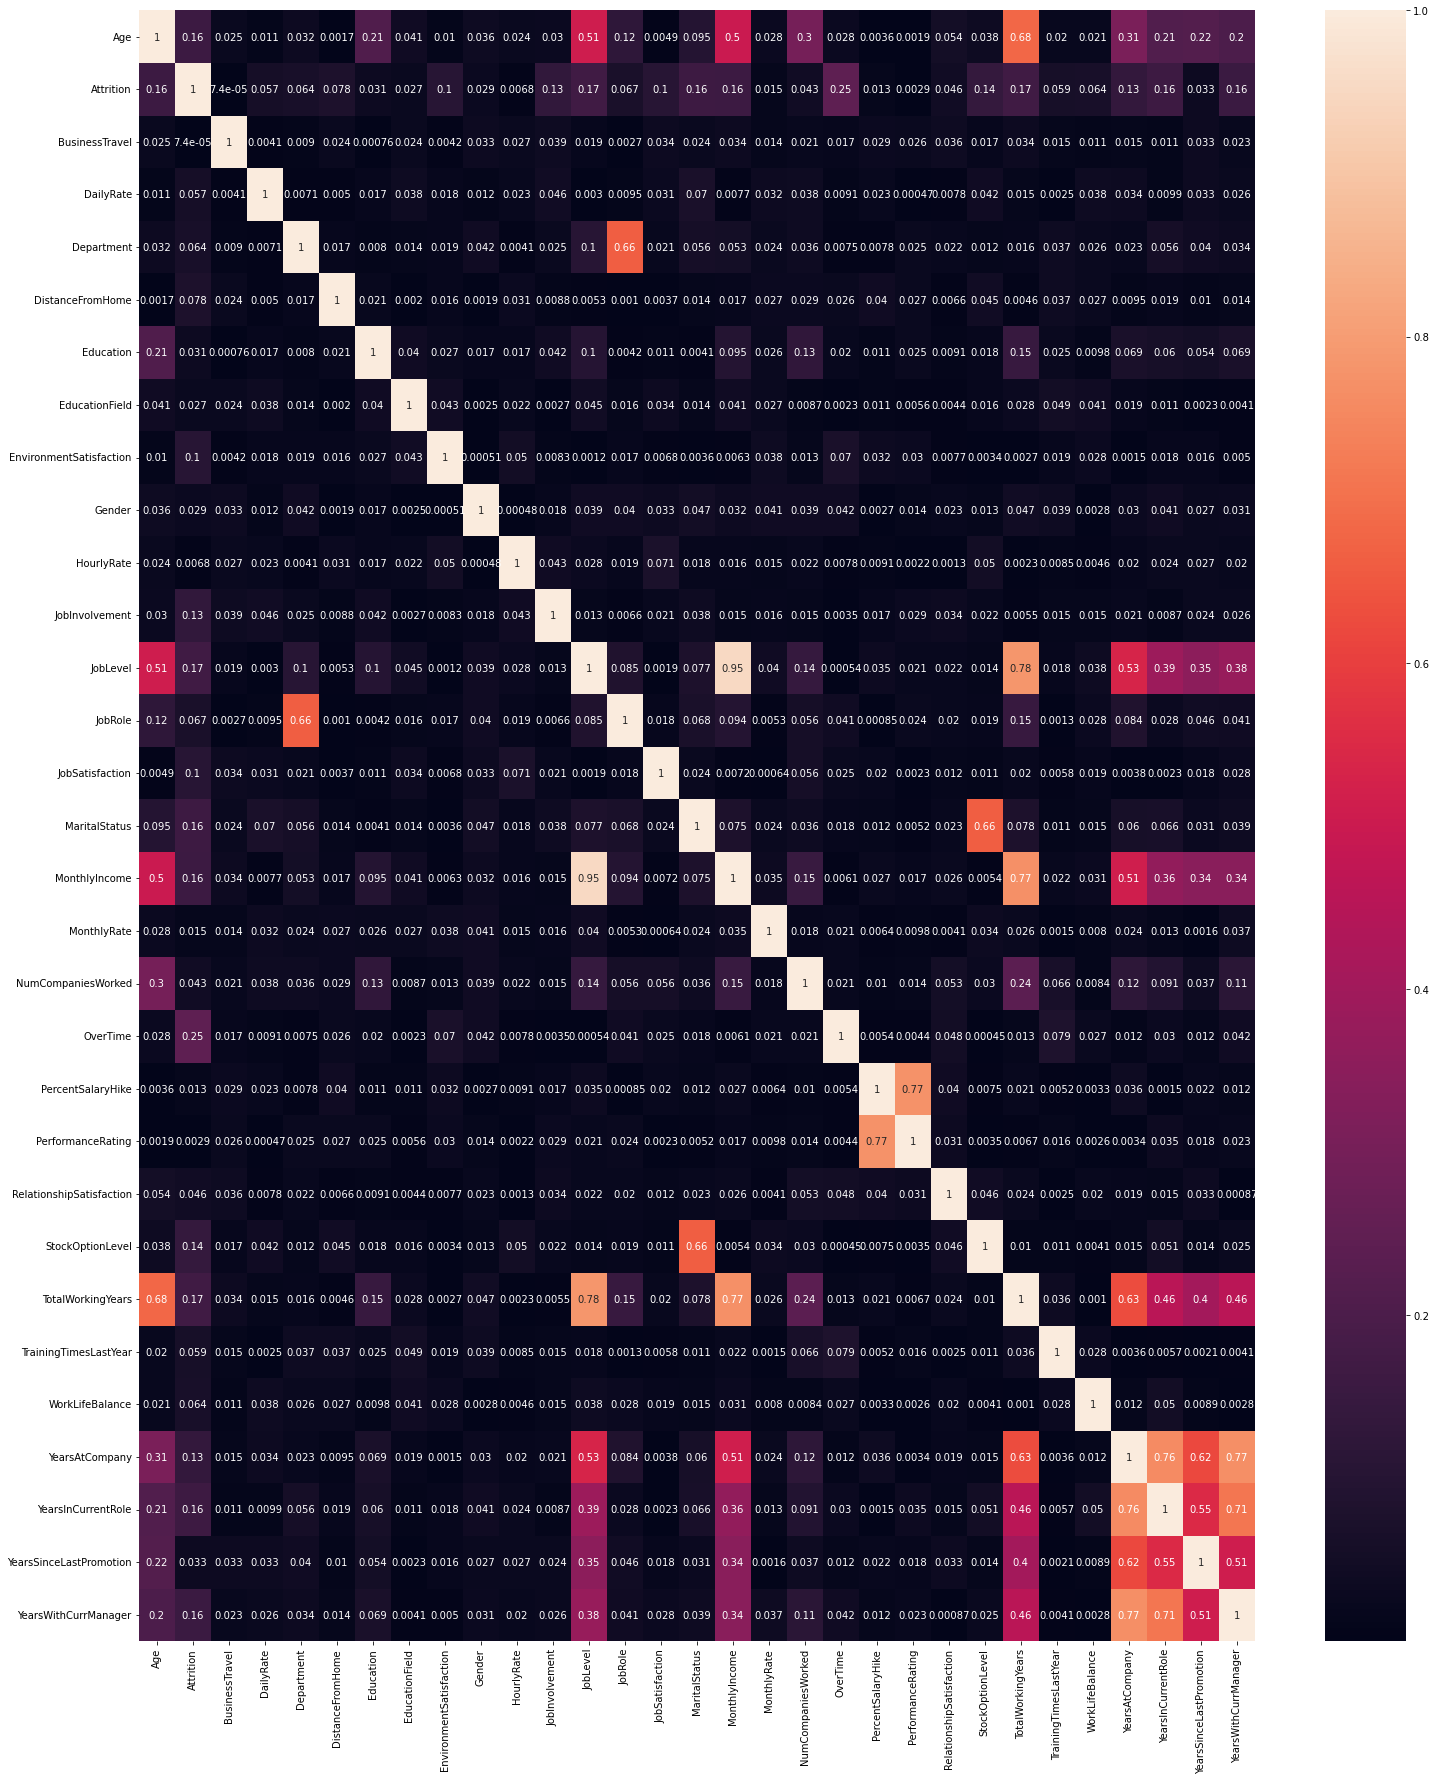

In [25]:
# Plotting heat map to check for multicollinerity and labelv/s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(25,30))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [26]:
# Dividing data into feature and label
X= data.drop(columns=['Attrition'])
Y= data['Attrition']

In [27]:
#Applying Power Transformer
p_transformer = PowerTransformer()
X_scaled = pd.DataFrame(p_transformer.fit_transform(X), columns=X.columns)

In [28]:
#Checking for skewness
X_scaled.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

In [29]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,2.103232,Age
1,1.012363,BusinessTravel
2,1.021841,DailyRate
3,2.026889,Department
4,1.011733,DistanceFromHome
5,1.068224,Education
6,1.027262,EducationField
7,1.019606,EnvironmentSatisfaction
8,1.020096,Gender
9,1.022135,HourlyRate


In [30]:
# checking unique values in the label:
print(Y.value_counts(normalize=True, dropna=False)*100)

0    83.877551
1    16.122449
Name: Attrition, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

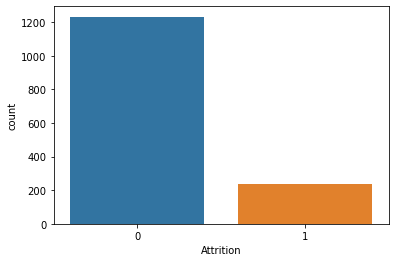

In [31]:
sns.countplot(Y)
plt.show

In [32]:
# checking unique values in the label:
print(Y.value_counts(normalize=True, dropna=False)*100)

0    83.877551
1    16.122449
Name: Attrition, dtype: float64


In [33]:
# the target is imbalanced 
#we will balance it using SMOTE
from imblearn.over_sampling import SMOTE

In [34]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 285)

In [35]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

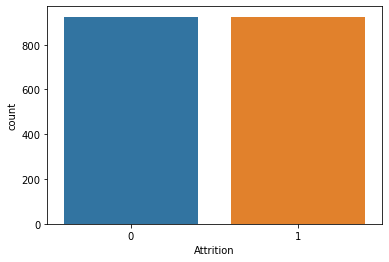

In [36]:
sns.countplot(y_train_rs)
plt.show()

In [37]:
#Selecting RandomState
lg = LogisticRegression()
for i in range(100,500):
    x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  100 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.77173913043478

-----------------------------------------

At random state  101 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.31521739130434

-----------------------------------------

At random state  103 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  106 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  115 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.5

-----------------------------------------

At random state  118 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of

At random state  280 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.5

-----------------------------------------

At random state  285 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  287 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  289 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.77173913043478

-----------------------------------------

At random state  293 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  297 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of

At random state  456 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.5

-----------------------------------------

At random state  457 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 87.5

-----------------------------------------

At random state  463 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  466 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  467 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing model : 88.04347826086956

-----------------------------------------

At random state  475 the model performs well
Acuraccy of training model : 88.11252268602541
Accuracy of testing mode

In [38]:
#traintestsplit
x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 267)

In [39]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    print(algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :\n",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n-----------------------------------------\n")
    


In [40]:
#Logistic Regression
lg= LogisticRegression()
model_selection(lg,x_train_rs,y_train_rs,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

#Decision Tree
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train_rs,y_train_rs,x_test,y_test)

#Random Forest 
rf= RandomForestClassifier()
model_selection(rf,x_train_rs,y_train_rs,x_test,y_test)

#Support Vector Classifier
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

LogisticRegression()
Acuraccy of training model : 0.8820326678765881
Accuracy of testing model : 0.8641304347826086
Classification report of training data :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       927
           1       0.76      0.37      0.50       175

    accuracy                           0.88      1102
   macro avg       0.83      0.67      0.72      1102
weighted avg       0.87      0.88      0.86      1102

Classification report of test data :
                precision    recall  f1-score   support

           0       0.88      0.97      0.92       306
           1       0.71      0.32      0.44        62

    accuracy                           0.86       368
   macro avg       0.80      0.65      0.68       368
weighted avg       0.85      0.86      0.84       368

Confusion Matrix 
 [[298   8]
 [ 42  20]]

-----------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.875680580

In [41]:
# Hyperparameter Tuning :
#LogisticRegression
parameters = {'penalty':['l1','l2','elasticnet'],
    'solver': ['lbfgs','liblinear','saga']
    }

clf = GridSearchCV(lg,parameters)
clf.fit(x_train_rs,y_train_rs)
print ("LogisticReg: \n",clf.best_params_)

#KNN
parameters = {'algorithm':['kd-tree','brute'],
    'leaf_size': range(3,7),
    'n_neighbors': range(3,10)
    }

clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print ("KNN: \n",clf.best_params_)

#SVC
parameters = {'kernel':['rbf', 'ploy', 'sigmoid'],
              'gamma':['auto','scale'],
              'max_iter': (30, 75, 100)
    }

clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print ("SVC: \n",clf.best_params_)

LogisticReg: 
 {'penalty': 'l1', 'solver': 'liblinear'}
KNN: 
 {'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 5}
SVC: 
 {'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 100}


In [42]:
lg1= LogisticRegression(penalty='l1', solver='liblinear')
model_selection(lg1,x_train_rs,y_train_rs,x_test,y_test)

knn1=KNeighborsClassifier (algorithm = 'brute', leaf_size =3, n_neighbors = 9)
model_selection(knn1,x_train_rs,y_train_rs,x_test,y_test)

svc1= SVC(gamma = 'auto',kernel= 'rbf',max_iter=100)
model_selection(svc1,x_train_rs,y_train_rs,x_test,y_test)

LogisticRegression(penalty='l1', solver='liblinear')
Acuraccy of training model : 0.8838475499092558
Accuracy of testing model : 0.8614130434782609
Classification report of training data :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       927
           1       0.78      0.37      0.50       175

    accuracy                           0.88      1102
   macro avg       0.84      0.68      0.72      1102
weighted avg       0.87      0.88      0.87      1102

Classification report of test data :
                precision    recall  f1-score   support

           0       0.87      0.97      0.92       306
           1       0.70      0.31      0.43        62

    accuracy                           0.86       368
   macro avg       0.79      0.64      0.67       368
weighted avg       0.85      0.86      0.84       368

Confusion Matrix 
 [[298   8]
 [ 43  19]]

-----------------------------------------

KNeighborsClassifier(algorithm=

<function matplotlib.pyplot.show(close=None, block=None)>

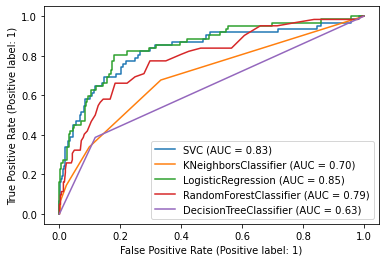

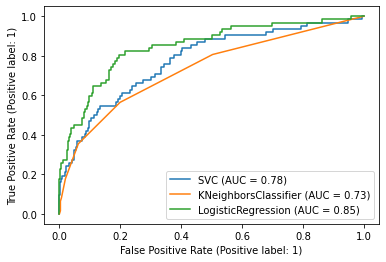

In [43]:
#AUC ROC curve : testdata
disp = plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)
plot_roc_curve(lg,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(svc1,x_test,y_test)
plot_roc_curve(knn1,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(lg1,x_test,y_test, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

In [44]:
# Saving Model
import pickle
filename= 'IBM_HR.pkl'
pickle.dump(lg,open(filename, 'wb'))

In [45]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (lg.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,No,No
1,No,No
2,No,No
3,No,No
4,No,Yes
...,...,...
363,No,No
364,No,No
365,No,No
366,No,No
